## Analysis of an E-commerce Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

### Name: Nafi Al-Hasan

In [1]:
# Importing all necessary libraries

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import OrdinalEncoder

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [2]:
# Importing the cleaned e-commerce dataset

cleaned_ecomm_data = pd.read_csv("cleaned_ecommerce_dataset.csv")

### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.

  Hints: To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [3]:
# Finding the first 5 rows of the dataset using head() function

cleaned_ecomm_data.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4


In [4]:
# Finding the last 5 rows of the dataset using tail() function

cleaned_ecomm_data.tail()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
2680,2445,22000,Great movie!,Austin Powers: The Spy Who Shagged Me,5.0,3.0,M,Movies,9,111.00,5
2681,2445,30700,Good food!,Outback Steakhouse,5.0,3.0,M,Restaurants & Gourmet,50,25.00,5
2682,2445,61500,Great movie!,Fight Club,5.0,3.0,M,Movies,26,97.53,5
2683,2445,100500,Awesome Game.,The Sims 2: Open for Business for Windows,5.0,4.0,M,Games,79,27.00,5
2684,2445,101400,Great Service.,PayPal,5.0,3.0,M,Personal Finance,52,38.00,5


In [5]:
# Finding the data types and columns of the dataset using info() function

cleaned_ecomm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   rating       2685 non-null   float64
 5   helpfulness  2685 non-null   float64
 6   gender       2685 non-null   object 
 7   category     2685 non-null   object 
 8   item_id      2685 non-null   int64  
 9   item_price   2685 non-null   float64
 10  user_city    2685 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 230.9+ KB


In [6]:
# Finding the descriptive statistics of the dataset

cleaned_ecomm_data.describe()

,userId,timestamp,rating,helpfulness,item_id,item_price,user_city
count,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000
mean,4673.237616,58812.687151,3.705028,3.908007,43.478585,83.091650,19.456983
std,3517.893437,37013.726118,1.346240,0.289069,26.630426,42.227558,11.397281
min,4.000000,10100.000000,1.000000,3.000000,0.000000,12.000000,0.000000
25%,1310.000000,22000.000000,3.000000,4.000000,21.000000,49.000000,9.000000
50%,4666.000000,52800.000000,4.000000,4.000000,42.000000,73.650000,19.000000
75%,7651.000000,91000.000000,5.000000,4.000000,67.000000,129.820000,28.000000
max,10779.000000,123199.000000,5.000000,4.000000,88.000000,149.000000,39.000000


In [7]:
# Finding the number of records in the dataset

print("The number of records in the dataset:", len(cleaned_ecomm_data))

The number of records in the dataset: 2685


In [8]:
# Finding the number of records and columns in the dataset

cleaned_ecomm_data.shape

(2685, 11)

In [9]:
# Finding the names of the columns

cleaned_ecomm_data.columns

Index(['userId', 'timestamp', 'review', 'item', 'rating', 'helpfulness',
       'gender', 'category', 'item_id', 'item_price', 'user_city'],
      dtype='object')

In [10]:
# Converting categorical data into its numeric form 

encoder = OrdinalEncoder()
categorical_columns = ["gender", "item", "category", "review"]
cleaned_ecomm_data[categorical_columns] = encoder.fit_transform(cleaned_ecomm_data[categorical_columns])
display(cleaned_ecomm_data)

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,1618.0,37.0,4.0,3.0,1.0,8.0,41,30.74,4
1,4081,72000,1125.0,67.0,1.0,4.0,1.0,8.0,74,108.30,4
2,4081,72000,2185.0,77.0,5.0,4.0,1.0,8.0,84,69.00,4
3,4081,100399,2243.0,61.0,5.0,3.0,1.0,5.0,68,143.11,4
4,4081,100399,1033.0,5.0,3.0,3.0,1.0,5.0,6,117.89,4
...,...,...,...,...,...,...,...,...,...,...,...
2680,2445,22000,968.0,8.0,5.0,3.0,1.0,5.0,9,111.00,5
2681,2445,30700,920.0,45.0,5.0,3.0,1.0,8.0,50,25.00,5
2682,2445,61500,968.0,24.0,5.0,3.0,1.0,5.0,26,97.53,5
2683,2445,100500,372.0,72.0,5.0,4.0,1.0,1.0,79,27.00,5


In [11]:
# Calculating the correlation between the variables

cleaned_ecomm_data.corr()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
userId,1.000000,-0.069176,0.007139,-0.005513,0.032506,-0.166136,-0.058324,-0.041362,-0.005549,0.024576,-0.030031
timestamp,-0.069176,1.000000,0.007029,-0.003543,0.000369,0.014179,-0.003367,0.015009,-0.004452,0.010979,-0.014934
review,0.007139,0.007029,1.000000,0.163090,-0.036118,-0.028259,-0.037884,0.001970,0.163544,-0.041421,0.045626
item,-0.005513,-0.003543,0.163090,1.000000,0.043388,-0.020433,0.001925,-0.045988,0.999765,-0.049885,-0.005220
rating,0.032506,0.000369,-0.036118,0.043388,1.000000,-0.007523,-0.034337,-0.163158,0.042890,0.027374,-0.028825
helpfulness,-0.166136,0.014179,-0.028259,-0.020433,-0.007523,1.000000,0.075947,-0.013408,-0.019882,0.004112,0.012086
gender,-0.058324,-0.003367,-0.037884,0.001925,-0.034337,0.075947,1.000000,0.022549,0.002370,-0.040596,-0.065638
category,-0.041362,0.015009,0.001970,-0.045988,-0.163158,-0.013408,0.022549,1.000000,-0.045268,-0.115571,0.008017
item_id,-0.005549,-0.004452,0.163544,0.999765,0.042890,-0.019882,0.002370,-0.045268,1.000000,-0.054450,-0.005576
item_price,0.024576,0.010979,-0.041421,-0.049885,0.027374,0.004112,-0.040596,-0.115571,-0.054450,1.000000,-0.023427


In [12]:
# Calculating the correlation coefficient between helpfulness and rating

correlation = cleaned_ecomm_data.corr()
correlation_helpfulness_rating = correlation.loc["helpfulness", "rating"]
print("The correlation between helpfulness and rating: ", correlation_helpfulness_rating)

The correlation between helpfulness and rating:  -0.0075233377268442226


##### **Analysis:**

The correlation between helpfulness and rating is -0.0075233377268442226. This value suggests an extremely weak negative association between these two variables, which is statistically insignificant.

In [13]:
# Calculating the correlation coefficient between gender and rating

correlation = cleaned_ecomm_data.corr()
correlation_gender_rating = correlation.loc["gender", "rating"]
print("The correlation between gender and rating: ", correlation_gender_rating)

The correlation between gender and rating:  -0.034336614242082654


##### **Analysis:**

The correlation between gender and rating is -0.034336614242082654. This value suggests a very weak negative association between these two variables.

In [14]:
# Calculating the correlation coefficient between category and rating

correlation = cleaned_ecomm_data.corr()
correlation_category_rating = correlation.loc["category", "rating"]
print("The correlation between category and rating: ", correlation_category_rating)

The correlation between category and rating:  -0.16315765340915675


##### **Analysis:**

The correlation between category and rating is -0.16315765340915675. This value suggests a weak negative association between these two variables.

In [15]:
# Calculating the correlation coefficient between review and rating

correlation = cleaned_ecomm_data.corr()
correlation_review_rating = correlation.loc["review", "rating"]
print("The correlation between review and rating: ", correlation_review_rating)

The correlation between review and rating:  -0.03611838655212241


##### **Analysis:**

The correlation between review and rating is -0.03611838655212241. This value suggests a very weak negative association between these two variables.

### Analysing Correlations

From the calculated correlations of helpfulness/gender/category/review regarding rating:
* Category and rating are the most correlated variables/ features, with a correlation of -0.16315765340915675. This correlation suggests that as the category changes, there is a slight tendency for ratings to change in the opposite direction. Including category in the regression model may lead to better prediction as it captures the inherent differences in ratings across different product categories. The model can learn to assign higher or lower ratings based on the category of the item being rated.
* Review and rating are the second most correlated variables/ features, with a correlation of -0.03611838655212241. This correlation indicates that more negative reviews might be associated with slightly lower ratings. Including review as a feature can improve prediction accuracy to some extent. The model may learn to adjust ratings based on the sentiment expressed in the reviews associated with each item. However, as the correlation is relatively weak, the impact on prediction results may not be substantial.
* Gender and rating are the third most correlated variables/ features, with a correlation of -0.034336614242082654. This correlation implies there may be a slight difference in ratings based on gender, but it's not a significant factor. As a result, incorporating gender as a feature in the model may not contribute much to the prediction performance.
* Helpfulness and rating are the least correlated variables/ features, with a correlation of -0.0075233377268442226. This correlation indicates that there is almost no linear relationship between these two. Therefore, using helpfulness alone might not be effective in predicting ratings accurately.

### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

### Case 1 - Training Data Containing 10% of the Entire Data

In [16]:
# Spliting the data into training and testing set based on case 1 condition

train_1, test_1 = train_test_split(cleaned_ecomm_data, test_size = 0.9, random_state = 142)
print("Trining set for Case 1:", train_1.shape)
print("Testing set for Case 1:", test_1.shape)

Trining set for Case 1: (268, 11)
Testing set for Case 1: (2417, 11)


### Case 2 - Training Data Containing 90% of the Entire Data

In [17]:
# Spliting the data into training and testing set based on case 2 condition

train_2, test_2 = train_test_split(cleaned_ecomm_data, test_size = 0.1, random_state = 142)
print("Trining set for Case 2:", train_2.shape)
print("Testing set for Case 2:", test_2.shape)

Trining set for Case 2: (2416, 11)
Testing set for Case 2: (269, 11)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features from helpfulness/gender/category/review regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

#### (model-a) using the training/testing data in case 1 with two most correlated input features

In [18]:
# Building model-a

x_train_a = train_1[["category", "review"]]
y_train_a = train_1["rating"]
x_test_a = train_1[["category", "review"]]
y_test_a = train_1["rating"]

In [19]:
# Training model-a

reg_a = linear_model.LinearRegression()
reg_a.fit(x_train_a, y_train_a)

LinearRegression()

#### (model-b) using the training/testing data in case 1 with two least correlated input features

In [20]:
# Building model-b

x_train_b = train_1[["helpfulness", "gender"]]
y_train_b = train_1["rating"]
x_test_b = train_1[["helpfulness", "gender"]]
y_test_b = train_1["rating"]

In [21]:
# Training model-b

reg_b = linear_model.LinearRegression()
reg_b.fit(x_train_b, y_train_b)

LinearRegression()

#### (model-c) using the training/testing data in case 2 with two most correlated input features

In [22]:
# Building model-c

x_train_c = train_2[["category", "review"]]
y_train_c = train_2["rating"]
x_test_c = train_2[["category", "review"]]
y_test_c = train_2["rating"]

In [23]:
# Training model-c

reg_c = linear_model.LinearRegression()
reg_c.fit(x_train_c, y_train_c)

LinearRegression()

#### (model-d) using the training/testing data in case 2 with two least correlated input features

In [24]:
# Building model-d

x_train_d = train_2[["helpfulness", "gender"]]
y_train_d = train_2["rating"]
x_test_d = train_2[["helpfulness", "gender"]]
y_test_d = train_2["rating"]

In [25]:
# Training model-d

reg_d = linear_model.LinearRegression()
reg_d.fit(x_train_d, y_train_d)

LinearRegression()

### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

#### Evaluating model-a

In [26]:
# Evaluating model-a

a_predicted = reg_a.predict(x_test_a)
a_mse = ((np.array(y_test_a) - a_predicted) ** 2).sum()/len(y_test_a)
a_rmse = np.sqrt(a_mse)
a_r2 = r2_score(y_test_a, a_predicted)
print("Mean Squared Error of model-a:", a_mse)
print("Rooted Mean Squared Error of model-a:", a_rmse)
print("R Squared of model-a:", a_r2)

Mean Squared Error of model-a: 1.768624414593739
Rooted Mean Squared Error of model-a: 1.3298963924282745
R Squared of model-a: 0.048402664196232625


#### Evaluating model-b

In [27]:
# Evaluating model-b

b_predicted = reg_b.predict(x_test_b)
b_mse = ((np.array(y_test_b) - b_predicted) ** 2).sum()/len(y_test_b)
b_rmse = np.sqrt(b_mse)
b_r2 = r2_score(y_test_b, b_predicted)
print("Mean Squared Error of model-b:", b_mse)
print("Rooted Mean Squared Error of model-b:", b_rmse)
print("R Squared of model-b:", b_r2)

Mean Squared Error of model-b: 1.829052830573724
Rooted Mean Squared Error of model-b: 1.35242479664258
R Squared of model-b: 0.01588953185512776


#### Evaluating model-c

In [28]:
# Evaluating model-c

c_predicted = reg_c.predict(x_test_c)
c_mse = ((np.array(y_test_c) - c_predicted) ** 2).sum()/len(y_test_c)
c_rmse = np.sqrt(c_mse)
c_r2 = r2_score(y_test_c, c_predicted)
print("Mean Squared Error of model-c:", c_mse)
print("Rooted Mean Squared Error of model-c:", c_rmse)
print("R Squared of model-c:", c_r2)

Mean Squared Error of model-c: 1.7619080458947187
Rooted Mean Squared Error of model-c: 1.327368843198724
R Squared of model-c: 0.0280991044968949


#### Evaluating model-d

In [29]:
# Evaluating model-d

d_predicted = reg_d.predict(x_test_d)
d_mse = ((np.array(y_test_d) - d_predicted) ** 2).sum()/len(y_test_d)
d_rmse = np.sqrt(d_mse)
d_r2 = r2_score(y_test_d, d_predicted)
print("Mean Squared Error of model-d:", d_mse)
print("Rooted Mean Squared Error of model-d:", d_rmse)
print("R Squared of model-d:", d_r2)

Mean Squared Error of model-d: 1.8096390081052867
Rooted Mean Squared Error of model-d: 1.345228236436214
R Squared of model-d: 0.0017698275384493423


In [30]:
# Creating new data frame for the models with their corresponding MSE, R Squared, and RMSE values

linear_regression_models = {
    "models" : ["model-a", "model-b", "model-c", "model-d"],
    "mse" : [a_mse, b_mse, c_mse, d_mse],
    "rmse" :[a_rmse, b_rmse, c_rmse, d_rmse],
    "r2" : [a_r2, b_r2, c_r2, d_r2]    
}

In [31]:
# Printing the new data frame

models = pd.DataFrame(linear_regression_models)
print(models)

    models       mse      rmse        r2
0  model-a  1.768624  1.329896  0.048403
1  model-b  1.829053  1.352425  0.015890
2  model-c  1.761908  1.327369  0.028099
3  model-d  1.809639  1.345228  0.001770


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

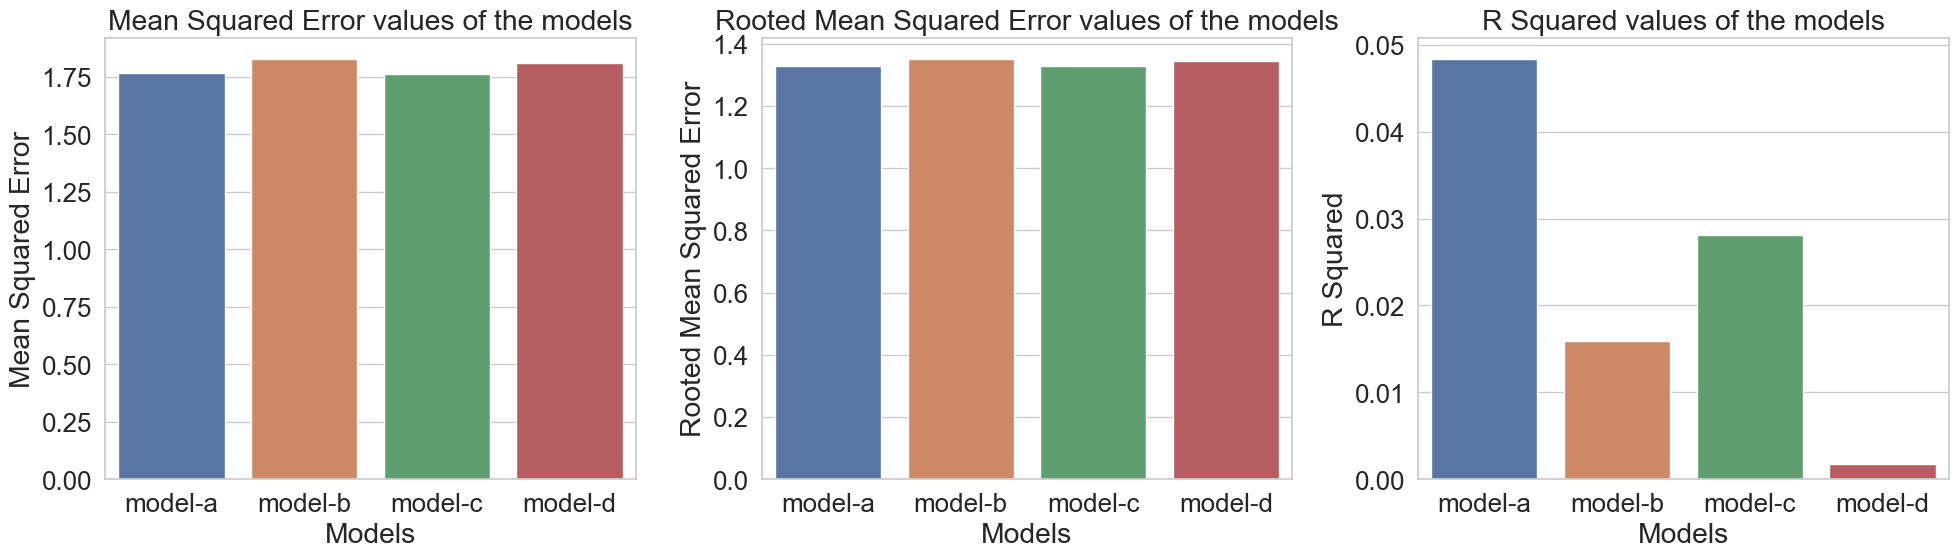

In [32]:
# Plotting of the MSE, RMSE, and R Squared values for each model

# Setting the style for Seaborn
sns.set(style = "whitegrid", font_scale = 1.7)

# Creating the figure and axes
fig, axs = plt.subplots(1, 3, figsize = (20, 6))

# Plotting Mean Squared Error values
sns.barplot(x = models["models"], y = models["mse"], ax = axs[0])
axs[0].set_title("Mean Squared Error values of the models")
axs[0].set_xlabel("Models")
axs[0].set_ylabel("Mean Squared Error")

# Plotting Rooted Mean Squared Error values
sns.barplot(x = models["models"], y = models["rmse"], ax = axs[1])
axs[1].set_title("Rooted Mean Squared Error values of the models")
axs[1].set_xlabel("Models")
axs[1].set_ylabel("Rooted Mean Squared Error")

# Plotting R Squared values
sns.barplot(x = models["models"], y = models["r2"], ax = axs[2])
axs[2].set_title("R Squared values of the models")
axs[2].set_xlabel("Models")
axs[2].set_ylabel("R Squared")

# Adjusting layout to prevent overlap
plt.tight_layout()  

plt.show()

### Analysis of the Visualization

Model-c, with the most correlated features with rating (category and review) and more training data (90%), has the lowest mean squared error and rooted mean squared error, which indicates that the model's predictions are closer to true values, very closely followed by model-a. However, model-a, with the most correlated features with rating (category and review) and less training data (10%), has the highest R-squared value, which implies model-a is a better fit to the model, followed by model-c.